In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gym.envs.registration import register
import random

1. pip install gym
2. pip install gym[atari]

In [ ]:
env = gym.make("FrozenLake-v0")
observation = env.reset()
env.render()
while True:
    
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    env.render()
    print(f"state: {state}, reward: {reward}")
    print(f"done?!: {done},  information: {info}")
    
    if done:
        print("Finish! with reward: {}".format(reward))
        break

# arrow keyin

In [ ]:
# import sys
# import termios
# import tty

# class _Getch:
#     def __call__(self):
#         fd = sys.stdin.fileno()
#         old_settings = termios.tcgetattr(fd)
#         try:
#             tty.setraw(sys.stdin.filno())
#             ch = sys.stdin.read(3)
#         finally:
#             termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
#         return ch
    
# inkey = _Getch()

# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

# # key_mapping
# arrow_keys = {
#     '\x1b]A':UP,
#     '\x1b]B':DOWN,
#     '\x1b]C':RIGHT,
#     '\x1b]D':LEFT
# }

        

# dummy Q-learning by Q-table

# Algorithm
```
init Q(s,a) <- 0
observe current s
Do True:
    Select an action a and execute it
    Receive immediate reward r
    Observe the new state s'
    Update table entry for Q(s,a) as follows
        Q(s,a) <- r + max Q(s',a') on a'
```

In [2]:
def rargmax(vector): 
    m = np.amax(vector) # maximum at vector by row?!
    indices = np.nonzero(vector==m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)
env = gym.make("FrozenLake-v3")

In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n]) # 16x4
num_episodes = 2000
rList = [] # list to contain total rewards per episode

In [4]:
for i in range(num_episodes):
    # Rest environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :]) # random argmax
        
        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-Table with new knowledge using learning_rate
        Q[state,action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)
    
print(f"Success rate: {str(sum(rList)/num_episodes)}")
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)


Success rate: 0.936
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


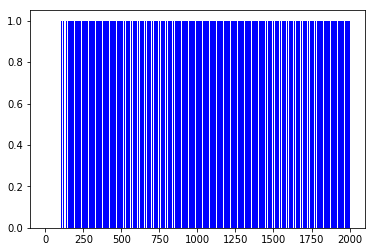

In [6]:
plt.bar(list(range(1,num_episodes+1)),rList[:2000],color="blue" )
plt.show()